In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
cv_health = pd.read_csv('https://github.com/luminarian/thinkful-capstone-2/raw/main/heart_statlog_cleveland_hungary_final.csv')

*Data Exploration*

The dataset consists of 1190 records of patients from US, UK, Switzerland and Hungary. It has 11 features and 1 target variable.

age: Patient's Age in years (Numeric)

sex: Patient's Gender Male as 1 Female as 0 (Nominal)

chest pain type: Type of chest pain categorized into 1 typical, 2 typical angina, 3 non-anginal pain, 4 asymptomatic (Categorical)

resting bp s: Level of blood pressure at resting mode in mm/HG (Numerical)

cholesterol: Serum cholestrol in mg/dl (Numeric)

fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false

resting ecg: result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy

max heart rate: Maximum heart rate achieved (Numeric)

exercise angina: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)

oldpeak: Exercise induced ST-depression in comparison with the state of rest (Numeric)

ST slope: ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping

(Info on ECG readings: https://litfl.com/st-segment-ecg-library/)

target: Heart Risk 1 means heart disease 0 means normal

Data Sources: https://www.kaggle.com/sid321axn/heart-statlog-cleveland-hungary-final, https://www.nature.com/articles/s41597-019-0206-3





In [200]:
cv_health

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [201]:
cv_health.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [202]:
cv_health_encoded = pd.get_dummies(cv_health, columns=['chest pain type', 'ST slope', 'resting ecg'])

In [203]:
from sklearn.model_selection import train_test_split
X = cv_health_encoded.drop('target', axis=1)
y = cv_health_encoded['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

*Gradient Boosting Classifier*

In [204]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
train_predict = gbc.predict(X_train)
test_predict = gbc.predict(X_test)
print(accuracy_score(y_train, train_predict))
print(accuracy_score(y_test, test_predict))

0.9495798319327731
0.9243697478991597


In [205]:
#High precision model
from sklearn.model_selection import GridSearchCV

params = {'learning_rate': [.001, .01, .1, .25, .5, .75, 1], 'max_depth': [2, 3, 5, 7, 11], 'max_features': ['auto', 'log2', .5], 'n_iter_no_change': [5]}
gbc_grid_precision = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5, verbose=1, scoring='precision', n_jobs=-1)
gbc_grid_precision.fit(X_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 510 out of 525 | elapsed:   18.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:   18.5s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'max_depth': [2, 3, 5, 7, 11],
                         'max_features': ['auto', 'log2', 0.5],
                         'n_iter_no_change': [5]},
             scoring='precision', verbose=1)

In [206]:
gbc_grid_precision_feature_importance = pd.DataFrame({'features': X.columns, 'importance scores': gbc_grid_precision.best_estimator_.feature_importances_}).sort_values(by='importance scores', ascending=False)
gbc_grid_precision.best_estimator_


GradientBoostingClassifier(learning_rate=0.5, max_depth=5, max_features=0.5,
                           n_iter_no_change=5)

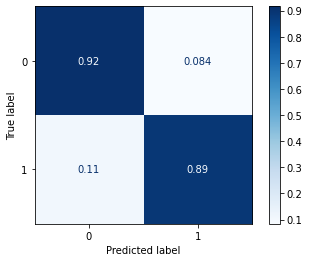

In [207]:
plot_confusion_matrix(gbc_grid_precision, X_test, y_test, normalize='true', cmap='Blues')
plt.show()

In [208]:
#High Recall Model
params = {'learning_rate': [.001, .01, .1, .25, .5, .75, 1], 'max_depth': [2, 3, 5, 7, 11], 'max_features': ['auto', 'log2', .5], 'n_iter_no_change': [5]}
gbc_grid_recall = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5, verbose=1, scoring='recall', n_jobs=-1)
gbc_grid_recall.fit(X_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 510 out of 525 | elapsed:   19.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:   19.8s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'max_depth': [2, 3, 5, 7, 11],
                         'max_features': ['auto', 'log2', 0.5],
                         'n_iter_no_change': [5]},
             scoring='recall', verbose=1)

In [209]:
gbc_grid_recall_feature_importance = pd.DataFrame({'features': X.columns, 'importance scores': gbc_grid_recall.best_estimator_.feature_importances_}).sort_values(by='importance scores', ascending=False)
gbc_grid_recall.best_estimator_

GradientBoostingClassifier(learning_rate=0.001, max_depth=2,
                           max_features='log2', n_iter_no_change=5)

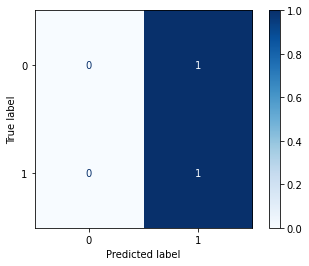

In [210]:
plot_confusion_matrix(gbc_grid_recall, X_test, y_test, normalize='true', cmap='Blues')
plt.show()

In [211]:
#High F1 Score Model
params = {'learning_rate': [.001, .01, .1, .25, .5, .75, 1], 'max_depth': [2, 3, 5, 7, 11], 'max_features': ['auto', 'log2', .5], 'n_iter_no_change': [5]}
gbc_grid_f1 = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5, verbose=1, scoring='f1', n_jobs=-1)
gbc_grid_f1.fit(X_train, y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 510 out of 525 | elapsed:   20.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 525 out of 525 | elapsed:   20.3s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'max_depth': [2, 3, 5, 7, 11],
                         'max_features': ['auto', 'log2', 0.5],
                         'n_iter_no_change': [5]},
             scoring='f1', verbose=1)

In [212]:
gbc_grid_f1_feature_importance = pd.DataFrame({'features': X.columns, 'importance scores': gbc_grid_recall.best_estimator_.feature_importances_}).sort_values(by='importance scores', ascending=False)
gbc_grid_f1.best_estimator_

GradientBoostingClassifier(max_depth=7, max_features='log2', n_iter_no_change=5)

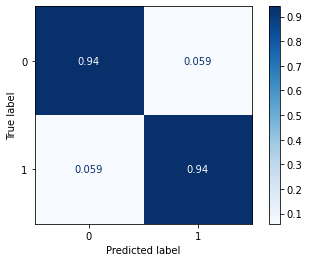

In [213]:
plot_confusion_matrix(gbc_grid_f1, X_test, y_test, normalize='true', cmap='Blues')
plt.show()

*Ada Boost Classifier*

In [217]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))
abc.fit(X_train, y_train)
train_predict = abc.predict(X_train)
test_predict = abc.predict(X_test)
print(accuracy_score(y_train, train_predict))
print(accuracy_score(y_test, test_predict))

1.0
0.907563025210084


In [218]:
#High precision model
params = {'learning_rate': [.001, .01, .1, .25, .5, .75, 1], 'n_estimators': [25, 50, 75, 100], 'base_estimator': [DecisionTreeClassifier(max_depth=3)]}
abc_grid_precision = GridSearchCV(AdaBoostClassifier(), param_grid=params, cv=5, verbose=1, scoring='precision', n_jobs=-1)
abc_grid_precision.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    6.1s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='precision', verbose=1)

In [219]:
abc_grid_precision_feature_importance = pd.DataFrame({'features': X.columns, 'importance scores': abc_grid_precision.best_estimator_.feature_importances_}).sort_values(by='importance scores', ascending=False)
abc_grid_precision.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=100)

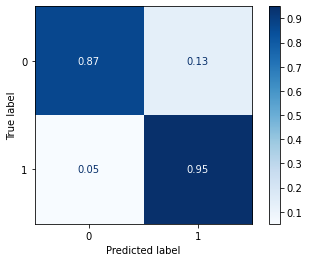

In [220]:
plot_confusion_matrix(abc_grid_precision, X_test, y_test, normalize='true', cmap='Blues')
plt.show()

In [222]:
#High Recall Model
params = {'learning_rate': [.001, .01, .1, .25, .5, .75, 1], 'n_estimators': [25, 50, 75, 100], 'base_estimator': [DecisionTreeClassifier(max_depth=3)]}
abc_grid_recall = GridSearchCV(AdaBoostClassifier(), param_grid=params, cv=5, verbose=1, scoring='recall', n_jobs=-1)
abc_grid_recall.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    6.2s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='recall', verbose=1)

In [223]:
abc_grid_recall_feature_importance = pd.DataFrame({'features': X.columns, 'importance scores': abc_grid_recall.best_estimator_.feature_importances_}).sort_values(by='importance scores', ascending=False)
abc_grid_recall.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=75)

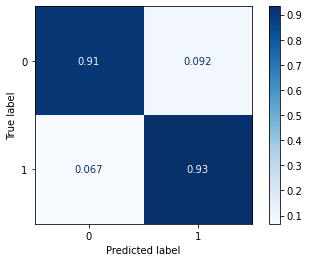

In [224]:
plot_confusion_matrix(abc_grid_recall, X_test, y_test, normalize='true', cmap='Blues')
plt.show()

In [225]:
#High F1 Model
params = {'learning_rate': [.001, .01, .1, .25, .5, .75, 1], 'n_estimators': [25, 50, 75, 100], 'base_estimator': [DecisionTreeClassifier(max_depth=3)]}
abc_grid_f1 = GridSearchCV(AdaBoostClassifier(), param_grid=params, cv=5, verbose=1, scoring='f1', n_jobs=-1)
abc_grid_f1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    6.3s finished


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'n_estimators': [25, 50, 75, 100]},
             scoring='f1', verbose=1)

In [227]:
abc_grid_f1_feature_importance = pd.DataFrame({'features': X.columns, 'importance scores': abc_grid_recall.best_estimator_.feature_importances_}).sort_values(by='importance scores', ascending=False)
abc_grid_f1.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=75)

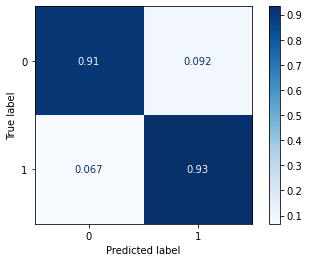

In [228]:
plot_confusion_matrix(abc_grid_f1, X_test, y_test, normalize='true', cmap='Blues')
plt.show()